In [ ]:
# comment this block and use as per your pc, this is for windows
import findspark
findspark.init("C:/spark") 

from pyspark import SparkContext
sc=SparkContext("local","Pyspark new")

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MyApp").getOrCreate()

print("Spark Version:", spark.version)

In [ ]:
import os
import findspark

os.environ["SPARK_HOME"] = "//home/hadoop/spark-3.5.6-bin-hadoop3"  # your Spark install path
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.11.0-openjdk-amd64"

findspark.init()

In [3]:
from pyspark import SparkContext
sc=SparkContext("local","Pyspark new")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/22 22:59:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [1]:
# vikasan
import os
import findspark
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'
os.environ['SPARK_HOME'] = '/home/vik/spark-3.5.6-bin-hadoop3'   # replace with your path

findspark.init()


In [ ]:
# vikasan
from pyspark import SparkContext
sc=SparkContext("local","Pyspark new")

# from pyspark.sql import SparkSession
# spark = SparkSession.builder \
#     .appName("wsl") \
#     .getOrCreate()

# print(spark.version)

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.executor.memory", "6G") \
    .config("spark.driver.memory", "6G") \
    .config("spark.sql.shuffle.partitions", "300") \
    .config("spark.memory.fraction", "0.8") \
    .getOrCreate()


25/10/24 09:18:54 WARN Utils: Your hostname, VKSN resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/10/24 09:18:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/24 09:18:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.local.dir", "/home/hadoop/spark-temp") \
    .getOrCreate()

print("Spark Version:", spark.version)

Spark Version: 3.5.6


In [4]:
from pyspark.sql.functions import * 
import matplotlib.pyplot as plt

# PHASE 1- DATASET UNDERSTANDING AND SETUP

#### Vikasan's part

In [15]:
from pyspark.sql.functions import * 

In [19]:
clickstream_df = spark.read \
    .option("delimiter", "\t") \
    .option("header",False)\
    .option("InferSchema",True)\
    .csv("file:///home/vik/BDA_miniproj/dataset/Clickstream-enwiki-2025-07.tsv")    #wsl-vikasan
    #.csv("file:///home/hadoop/Desktop/BDA_miniproj/dataset/clickstream-enwiki-2025-07.tsv") #in linux
    #.csv(r"dataset\clickstream-enwiki-2025-07.tsv")    #windows

In [29]:
month2 = spark.read \
    .option("delimiter", "\t") \
    .option("header",False)\
    .option("InferSchema",True)\
    .csv("file:///home/vik/BDA_miniproj/dataset/clickstream-enwiki-2025-08.tsv")

In [ ]:
columns = ["prev", "curr", "type", "n"]
clickstream_df = clickstream_df.toDF(*columns)  # writing the column headers

# show few rows
clickstream_df.show(10)

In [34]:
month2 = month2.toDF(*columns) 

In [21]:
clickstream_df.columns

['prev', 'curr', 'type', 'n']

In [8]:
noOfRows= clickstream_df.count()

In [9]:
noOfRows

36131419

In [35]:
print('No.of rows in month2')
month2.count()

No.of rows in month2


36432691

#### Prajwal's part

In [10]:
# do your part here 

In [11]:
# check the schema
clickstream_df.printSchema()
clickstream_df.show(5, truncate=False)

root
 |-- prev: string (nullable = true)
 |-- curr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- n: integer (nullable = true)

+-------------------+---------------+--------+---------+
|prev               |curr           |type    |n        |
+-------------------+---------------+--------+---------+
|other-empty        |Main_Page      |external|167194874|
|Meteor_(miniseries)|Ernie_Barbarash|link    |13       |
|other-search       |Ozzy_Osbourne  |external|7956732  |
|Meteor_(missile)   |Euro           |link    |13       |
|other-empty        |Hyphen-minus   |external|7819580  |
+-------------------+---------------+--------+---------+
only showing top 5 rows



In [12]:
# checking nulls
missing_counts = clickstream_df.select([
    count(when(col(c).isNull(), c)).alias(c) for c in clickstream_df.columns
])
missing_counts.show()

+----+----+----+---+
|prev|curr|type|  n|
+----+----+----+---+
|   0|   0|   0|  0|
+----+----+----+---+



In [37]:
# checking nulls for month2
missing_counts2 = month2.select([
    count(when(col(c).isNull(), c)).alias(c) for c in month2.columns
])
missing_counts2.show()

+----+----+----+---+
|prev|curr|type|  n|
+----+----+----+---+
|   0|   0|   0|  0|
+----+----+----+---+



In [ ]:
stats = clickstream_df.select(
    min("n").alias("minOf_n"),
    max("n").alias("maxOf_n"),
    mean("n").alias("meanOf_n")
)

In [14]:
stats.show()

+-------+---------+------------------+
|minOf_n|  maxOf_n|          meanOf_n|
+-------+---------+------------------+
|     10|167194874|181.54733773395392|
+-------+---------+------------------+



In [38]:
stats_m2 = month2.select(
    min("n").alias("minOf_n"),
    max("n").alias("maxOf_n"),
    mean("n").alias("meanOf_n")
)
stats_m2.show()

+-------+---------+------------------+
|minOf_n|  maxOf_n|          meanOf_n|
+-------+---------+------------------+
|     10|164702497|179.47503106482034|
+-------+---------+------------------+



In [15]:
a=clickstream_df.orderBy(col("n").asc()).select("prev","curr","n").limit(1)
b=clickstream_df.orderBy(col("n").desc()).select("prev","curr","n").limit(1)

In [16]:
a.show()
b.show()

+----+------------------+---+
|prev|              curr|  n|
+----+------------------+---+
|  !!|!_(disambiguation)| 10|
+----+------------------+---+

+-----------+---------+---------+
|       prev|     curr|        n|
+-----------+---------+---------+
|other-empty|Main_Page|167194874|
+-----------+---------+---------+



In [39]:
a=month2.orderBy(col("n").asc()).select("prev","curr","n").limit(1)
b=month2.orderBy(col("n").desc()).select("prev","curr","n").limit(1)

a.show() ; b.show()

+----+----------------+---+
|prev|            curr|  n|
+----+----------------+---+
| !!!|Electronic_music| 10|
+----+----------------+---+



+-----------+---------+---------+
|       prev|     curr|        n|
+-----------+---------+---------+
|other-empty|Main_Page|164702497|
+-----------+---------+---------+



#### Dhruva's part

In [17]:
# do your part here 
# inspect curr, prev, link (distribution analysis)

In [18]:
# Find rows where n is not a pure number
df_invalid_n = clickstream_df.filter(~col("n").cast("string").rlike("^[0-9]+$"))
df_invalid_n.show(20, truncate=False)

# Count them
print("Invalid n rows:", df_invalid_n.count())



+----+----+----+---+
|prev|curr|type|n  |
+----+----+----+---+
+----+----+----+---+

Invalid n rows: 0


In [19]:
#inspect 'type column'
clickstream_df.groupBy("type").count().show(truncate=False)

+--------+--------+
|type    |count   |
+--------+--------+
|link    |22940461|
|other   |790412  |
|external|12400546|
+--------+--------+



In [40]:
#inspect 'type' column of month2
month2.groupBy("type").count().show(truncate=False)

+--------+--------+
|type    |count   |
+--------+--------+
|link    |23688976|
|other   |806650  |
|external|11937065|
+--------+--------+



In [20]:
# inspect 'prev' column
clickstream_df.groupBy("prev").count().orderBy(desc("count")).show(20, truncate=False)        

+-------------------------------------------------------------+-------+
|prev                                                         |count  |
+-------------------------------------------------------------+-------+
|other-empty                                                  |5696646|
|other-search                                                 |4075166|
|other-internal                                               |1785075|
|other-external                                               |642457 |
|Main_Page                                                    |263151 |
|other-other                                                  |201202 |
|Deaths_in_2025                                               |5616   |
|Wikipedia                                                    |3684   |
|Wiki                                                         |2743   |
|List_of_United_States_counties_and_county_equivalents        |2480   |
|List_of_American_films_of_2025                               |2

# PHASE 2 - DATA PREPROCESSING

In [22]:
from pyspark.sql.functions import *

#### Vikasan's part
- we are dropping the rows that have 'prev' = 'other -other' as it doesn’t give meaningful context about where the user came from.

In [ ]:
# Remove rows where 'prev' is 'other-empty'
other_prev_col = clickstream_df.filter(col('prev') == 'other-other')

In [24]:
other_prev_col.count()

201202

In [41]:
other_prev_col2 = month2.filter(col('prev') == 'other-other')
other_prev_col2.count()

175583

In [25]:
clickstream_df = clickstream_df.filter(col('prev') != 'other-other')

In [26]:
print("After dropping 'other-other' rows from prev column: \n")
clickstream_df.show()

After dropping 'other-other' rows from prev column: 

+-------------------+--------------------+--------+---------+
|               prev|                curr|    type|        n|
+-------------------+--------------------+--------+---------+
|        other-empty|           Main_Page|external|167194874|
|Meteor_(miniseries)|     Ernie_Barbarash|    link|       13|
|       other-search|       Ozzy_Osbourne|external|  7956732|
|   Meteor_(missile)|                Euro|    link|       13|
|        other-empty|        Hyphen-minus|external|  7819580|
|   Meteor_(missile)|      Royal_Ordnance|    link|       13|
|     other-internal|           Main_Page|external|  6902577|
|   Meteor_(missile)|Saab_Bofors_Dynamics|    link|       13|
|       other-search|Superman_(2025_film)|external|  5462456|
|   Meteor_(missile)|     Sukhoi_Su-30MKI|    link|       13|
|       other-search|          Hulk_Hogan|external|  4169217|
|    Meteor_Airlines|             Tinghir|    link|       13|
|       other-se

In [27]:
clickstream_df.count()

35930217

In [42]:
month2 = month2.filter(col('prev') != 'other-other')
print("After dropping 'other-other' rows from prev column of month2: \n")
month2.show()

After dropping 'other-other' rows from prev column of month2: 

+--------------+--------------------+--------+---------+
|          prev|                curr|    type|        n|
+--------------+--------------------+--------+---------+
|   other-empty|           Main_Page|external|164702497|
|other-internal|Encyclopedia_of_U...|external|       14|
|   other-empty|        Hyphen-minus|external| 10259171|
|other-internal|Encyclopædia_Univ...|external|       14|
|other-internal|           Main_Page|external|  6584270|
|other-internal|     End-blown_flute|external|       14|
|  other-search|  Coolie_(2025_film)|external|  4745236|
|other-internal|End-of-history_il...|external|       14|
|  other-search| Weapons_(2025_film)|external|  4350257|
|other-internal|          End-to-end|external|       14|
|  other-search|        War_2_(film)|external|  3129513|
|other-internal|End-to-end_audita...|external|       14|
|   other-empty|             ChatGPT|external|  2982541|
|other-internal|End_of_t

In [43]:
month2.count()

36257108

In [ ]:
#clickstream_df = clickstream_df.dropna() #No nulls

In [44]:
#  run this once and keep it in your dataset folder (gitignore)
#clickstream_df.write.parquet("file:///home/hadoop/Desktop/BDA_miniproj/dataset/cleaned_clickstream.parquet")
#clickstream_df.write.parquet("file:///home/vik/BDA_miniproj/dataset/cleaned_clickstream.parquet")   #wsl
#month2.write.parquet("file:///home/vik/BDA_miniproj/dataset/cleaned_clickstream_m2.parquet")   #wsl

#### Prajwal's part

- Why Parquet?
    - Columnar storage - faster reads for analytics and ML.
    - Schema-preserving - int, string, etc. are stored as-is.
    - Highly compressed - smaller on disk compared to CSV/TSV.

In [45]:
# Load cleaned dataset from Parquet, use this for future analysis
#cleaned_df = spark.read.parquet("file:///home/hadoop/Desktop/BDA_miniproj/dataset/cleaned_clickstream.parquet") #on ubuntu
#cleaned_df = spark.read.parquet("dataset/cleaned_clickstream.parquet") #for windows
cleaned_df = spark.read.parquet("file:///home/vik/BDA_miniproj/dataset/cleaned_clickstream.parquet")   #wsl
cleaned_df2 = spark.read.parquet("file:///home/vik/BDA_miniproj/dataset/cleaned_clickstream_m2.parquet")   #wsl

In [46]:
cleaned_df.printSchema()
cleaned_df2.printSchema()

root
 |-- prev: string (nullable = true)
 |-- curr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- n: integer (nullable = true)

root
 |-- prev: string (nullable = true)
 |-- curr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- n: integer (nullable = true)



In [48]:
cleaned_df.count()

35930217

In [49]:
cleaned_df2.count()

36257108

In [52]:
cleaned_df.show(5)
cleaned_df2.show(5)

+--------------------+--------------------+----+---+
|                prev|                curr|type|  n|
+--------------------+--------------------+----+---+
|List_of_ISO_639_l...|    Bihari_languages|link| 82|
|List_of_Ice_Age_s...| Cervalces_latifrons|link| 82|
|List_of_Ig_Nobel_...|Alexander_Lukashenko|link| 82|
|List_of_Illuminat...|      Curious_George|link| 82|
|List_of_India_Tes...|         Dilip_Doshi|link| 82|
+--------------------+--------------------+----+---+
only showing top 5 rows

+--------------------+-------------------+----+---+
|                prev|               curr|type|  n|
+--------------------+-------------------+----+---+
|            El_Bulli|   Anthony_Bourdain|link| 63|
|El_Camino:_A_Brea...|    Charles_Newirth|link| 63|
|El_Chapulín_Colorado|Angelines_Fernández|link| 63|
|    El_Chavo_Animado|       Doug_Erholtz|link| 63|
|           El_Choclo|     Ángel_Villoldo|link| 63|
+--------------------+-------------------+----+---+
only showing top 5 rows



In [ ]:
# Encoding 'type' column: link=0, external=1, other=2
cleaned_df = cleaned_df.withColumn(
    "type_encoded",
    when(cleaned_df["type"] == "link", 0)
    .when(cleaned_df["type"] == "external", 1)
    .when(cleaned_df["type"] == "other", 2)
)

# Check result
cleaned_df.select("type", "type_encoded").distinct().show()

# log1p function computes the natural logarithm of (value + 1), i.e., log(1 + x)
# Normalize click counts
cleaned_df = cleaned_df.withColumn("normalized_clicks", log1p(cleaned_df["n"]))

+--------+------------+
|    type|type_encoded|
+--------+------------+
|external|           1|
|   other|           2|
|    link|           0|
+--------+------------+



In [53]:
# Encoding 'type' column: link=0, external=1, other=2 for month2
cleaned_df2 = cleaned_df2.withColumn(
    "type_encoded",
    when(cleaned_df2["type"] == "link", 0)
    .when(cleaned_df2["type"] == "external", 1)
    .when(cleaned_df2["type"] == "other", 2)
)

# Check result
cleaned_df2.select("type", "type_encoded").distinct().show() 

# Normalize click counts
cleaned_df2 = cleaned_df2.withColumn("normalized_clicks", log1p(cleaned_df2["n"]))

+--------+------------+
|    type|type_encoded|
+--------+------------+
|external|           1|
|   other|           2|
|    link|           0|
+--------+------------+



In [39]:
cleaned_df.select("prev", "curr", "type", "n", "type_encoded", "normalized_clicks").show(10, truncate=False)

+-------------------------------------------------------+--------------------+----+---+------------+-----------------+
|prev                                                   |curr                |type|n  |type_encoded|normalized_clicks|
+-------------------------------------------------------+--------------------+----+---+------------+-----------------+
|List_of_ISO_639_language_codes                         |Bihari_languages    |link|82 |0           |4.418840607796598|
|List_of_Ice_Age_species_preserved_as_permafrost_mummies|Cervalces_latifrons |link|82 |0           |4.418840607796598|
|List_of_Ig_Nobel_Prize_winners                         |Alexander_Lukashenko|link|82 |0           |4.418840607796598|
|List_of_Illumination_productions                       |Curious_George      |link|82 |0           |4.418840607796598|
|List_of_India_Test_cricketers                          |Dilip_Doshi         |link|82 |0           |4.418840607796598|
|List_of_India_Test_cricketers                  

In [55]:
cleaned_df2.select("prev", "curr", "type", "n", "type_encoded", "normalized_clicks").show(10, truncate=False)

+-------------------------------+------------------------------+----+---+------------+------------------+
|prev                           |curr                          |type|n  |type_encoded|normalized_clicks |
+-------------------------------+------------------------------+----+---+------------+------------------+
|El_Bulli                       |Anthony_Bourdain              |link|63 |0           |4.1588830833596715|
|El_Camino:_A_Breaking_Bad_Movie|Charles_Newirth               |link|63 |0           |4.1588830833596715|
|El_Chapulín_Colorado           |Angelines_Fernández           |link|63 |0           |4.1588830833596715|
|El_Chavo_Animado               |Doug_Erholtz                  |link|63 |0           |4.1588830833596715|
|El_Choclo                      |Ángel_Villoldo                |link|63 |0           |4.1588830833596715|
|El_DeBarge_(album)             |Who's_Johnny                  |link|63 |0           |4.1588830833596715|
|El_Dorado                      |Lawrence_Kemy

In [40]:
cleaned_df.groupBy('type_encoded').count().show()

+------------+--------+
|type_encoded|   count|
+------------+--------+
|           1|12199344|
|           2|  790412|
|           0|22940461|
+------------+--------+



In [56]:
cleaned_df2.groupBy('type_encoded').count().show()

+------------+--------+
|type_encoded|   count|
+------------+--------+
|           1|11761482|
|           2|  806650|
|           0|23688976|
+------------+--------+



In [57]:
#cleaned_df.write.mode("overwrite").parquet(r"file:///home/hadoop/Desktop/BDA_miniproj/dataset/feature_engineered_clickstream.parquet")
#cleaned_df.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/feature_engineered_clickstream.parquet")  #wsl
#cleaned_df2.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/feature_engineered_clickstream_m2.parquet")  #wsl

In [58]:
print("Feature engineering complete. Saved as 'feature_engineered_clickstream.parquet'")


Feature engineering complete. Saved as 'feature_engineered_clickstream.parquet'


#### Dhruva's part

In [4]:
#feature_df= spark.read.parquet("file:///home/hadoop/Desktop/BDA_miniproj/dataset/feature_engineered_clickstream.parquet")
feature_df= spark.read.parquet("file:///home/vik/BDA_miniproj/dataset/feature_engineered_clickstream.parquet")   #wsl-vik
feature_df.printSchema()
feature_df.show(5, truncate=False)

root
 |-- prev: string (nullable = true)
 |-- curr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- n: integer (nullable = true)
 |-- type_encoded: integer (nullable = true)
 |-- normalized_clicks: double (nullable = true)



+--------------------------------+----------------------------+----+---+------------+------------------+
|prev                            |curr                        |type|n  |type_encoded|normalized_clicks |
+--------------------------------+----------------------------+----+---+------------+------------------+
|Ethnic_groups_in_the_Middle_East|Armenians_in_the_Middle_East|link|17 |0           |2.8903717578961645|
|Ethnic_groups_in_the_Middle_East|Assyrians_in_Georgia        |link|17 |0           |2.8903717578961645|
|Ethnic_groups_in_the_Middle_East|Demographics_of_Oman        |link|17 |0           |2.8903717578961645|
|Ethnic_groups_in_the_Middle_East|Qashqai_people              |link|17 |0           |2.8903717578961645|
|Ethnic_groups_in_the_Philippines|Ifugao_people               |link|17 |0           |2.8903717578961645|
+--------------------------------+----------------------------+----+---+------------+------------------+
only showing top 5 rows



In [5]:
expected_schema = ["prev", "curr", "type", "n", "type_encoded", "normalized_clicks"]

if list(feature_df.columns) == expected_schema:
    print("schema check passed.")
else:
    print("schema mismatch, verify columns:")
    print(feature_df.columns)

schema check passed.


In [6]:
null_counts = feature_df.select([
    count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in feature_df.columns
])
print(" Null/NaN counts (if any)")
null_counts.show()

 Null/NaN counts (if any)


+----+----+----+---+------------+-----------------+
|prev|curr|type|  n|type_encoded|normalized_clicks|
+----+----+----+---+------------+-----------------+
|  20|  35|   0|  0|           0|                0|
+----+----+----+---+------------+-----------------+



In [7]:
#no need of thia
# train_df, test_df = feature_df.randomSplit([0.8, 0.2], seed=42)
# print(f"Dataset split for checking anomaly: Train = {train_df.count()}, Test = {test_df.count()}")

# # Save final datasets
# # train_df.write.mode("overwrite").parquet("file:///home/hadoop/Desktop/BDA_miniproj/dataset/final_train_clickstream.parquet")
# # test_df.write.mode("overwrite").parquet("file:///home/hadoop/Desktop/BDA_miniproj/dataset/final_test_clickstream.parquet")

# # wsl-vik
# train_df.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/final_train_clickstream.parquet")
# test_df.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/final_test_clickstream.parquet")

Dataset split for checking anomaly: Train = 28742717, Test = 7187500


In [61]:
feature_df.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/train_clickstream.parquet")

In [59]:
feature_df2= spark.read.parquet("file:///home/vik/BDA_miniproj/dataset/feature_engineered_clickstream_m2.parquet")   #wsl-vik

train_df2, test_df2 = feature_df2.randomSplit([0.8, 0.2], seed=42)
train_df2.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/final_train_clickstream_m2.parquet")
test_df2.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/final_test_clickstream_m2.parquet")

# Phase 3- Anomaly detection

In [3]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, StandardScalerModel
from pyspark.ml.linalg import Vectors

### Vikasan's Part
- Detect Statistical Outliers
- Compute mean and standard deviation of n
- Calculate Z-scores and identify outlier navigation pairs


In [5]:
import matplotlib.pyplot as plt

In [6]:
#train_df= spark.read.parquet("file:///home/hadoop/Desktop/BDA_miniproj/dataset/final_train_clickstream.parquet")

train_df= spark.read.parquet("file:///home/vik/BDA_miniproj/dataset/train_clickstream.parquet")    #wsl-vik

In [63]:
train_df.show(2)

+--------------------+--------------------+----+---+------------+------------------+
|                prev|                curr|type|  n|type_encoded| normalized_clicks|
+--------------------+--------------------+----+---+------------+------------------+
|Ethnic_groups_in_...|Armenians_in_the_...|link| 17|           0|2.8903717578961645|
|Ethnic_groups_in_...|Assyrians_in_Georgia|link| 17|           0|2.8903717578961645|
+--------------------+--------------------+----+---+------------+------------------+
only showing top 2 rows



In [7]:
# test set
test_df2 = spark.read.parquet("file:///home/vik/BDA_miniproj/dataset/final_test_clickstream_m2.parquet")    #wsl-vik

In [68]:
# Train on the training set.
# mmean and stddev from the normalized_clicks column.
stats = train_df.select(
    mean("normalized_clicks").alias("mean_norm_clicks"),
    stddev("normalized_clicks").alias("stddev_norm_clicks")
).first()

mean_norm_clicks = stats["mean_norm_clicks"]
stddev_norm_clicks = stats["stddev_norm_clicks"]

print(f"Mean (normalized_clicks): {mean_norm_clicks}")
print(f"Standard Deviation (normalized_clicks): {stddev_norm_clicks}")

Mean (normalized_clicks): 3.6562865842334396
Standard Deviation (normalized_clicks): 1.1975899057217712


In [74]:
# use the training stats to calculate Z-scores for the test data
test_df2_with_zscore = test_df2.withColumn(
    "zscore",
    (col("normalized_clicks") - mean_norm_clicks) / stddev_norm_clicks
)

test_df2_with_zscore = test_df2_with_zscore.withColumn("abs_zscore", abs(col("zscore")))

In [75]:
# Identify outlier navigation pairs in the test set
outlier_threshold = 3
statistical_outliers = test_df2_with_zscore.filter(col("abs_zscore") > outlier_threshold)

print(f"Found {statistical_outliers.count()} statistical outliers in the test set:")

# Show the most anomalous pairs (highest Z-score)
statistical_outliers.orderBy(desc("abs_zscore")).show(20, truncate=False)


Found 119506 statistical outliers in the test set:


+--------------+-------------------------------------+--------+---------+------------+------------------+------------------+------------------+
|prev          |curr                                 |type    |n        |type_encoded|normalized_clicks |zscore            |abs_zscore        |
+--------------+-------------------------------------+--------+---------+------------+------------------+------------------+------------------+
|other-empty   |Main_Page                            |external|164702497|1           |18.9196513620031  |12.745067994348732|12.745067994348732|
|other-search  |Coolie_(2025_film)                   |external|4745236  |1           |15.3726519360918  |9.783286662555048 |9.783286662555048 |
|other-empty   |Deaths_in_2025                       |external|1748261  |1           |14.37413270954942 |8.949512745647668 |8.949512745647668 |
|other-search  |Saiyaara                             |external|1632957  |1           |14.30590365208725 |8.892540774577949 |8.8925407745

In [76]:
test_df2.count()

7253954

In [77]:
# list of statistically anomalous navigation pairs
statistical_outliers.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/results/statistical_outliers.parquet")

- Take 5% of rows randomly. good to reduce memory usage.
- rdd.flatMap(lambda x: x) flattens the column to a Python list.
- collect() brings the sample to the driver for plotting.

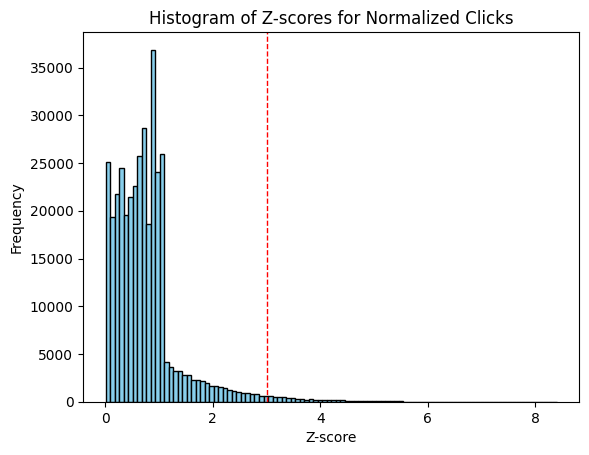

In [78]:
# Sample 50k rows
sample_z = test_df2_with_zscore.select("abs_zscore")\
                         .sample(fraction=0.05, seed=42)\
                         .rdd.flatMap(lambda x: x)\
                         .collect()

plt.hist(sample_z, bins=100, color='skyblue', edgecolor='black')
plt.axvline(3, color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Z-scores for Normalized Clicks")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()


### Dhruva's part

In [8]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.types import *

- inbound: from many 'prev' -> this 'curr'
- outbound: treat the 'curr' as 'prev' to get outgoing behavior

In [9]:
train_df.printSchema()

root
 |-- prev: string (nullable = true)
 |-- curr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- n: integer (nullable = true)
 |-- type_encoded: integer (nullable = true)
 |-- normalized_clicks: double (nullable = true)



In [10]:
in_agg = train_df.groupBy("curr").agg(
    countDistinct("prev").alias("in_degree"),              # distinct incoming sources
    sum(col("normalized_clicks")).alias("in_clicks"),     # sum of normalized inbound clicks
    count("*").alias("in_events")                         # number of inbound records (helpful)
)

out_agg = train_df.groupBy("prev").agg(
    countDistinct("curr").alias("out_degree"),              #countDistinct() - used  to count the no.of unique values within one or more columns of a DF
    sum(col("normalized_clicks")).alias("out_clicks"),
    count("*").alias("out_events")
).withColumnRenamed("prev", "curr")                         #withColumnRenamed() - used to rename a single existing column

In [11]:
article_features = in_agg.join(out_agg, on="curr", how="full_outer").fillna(0)

# Derived features (ratios and normalized rates)
article_features = article_features.withColumn(
    "ratio_out_in", (col("out_clicks") / (col("in_clicks") + lit(1.0)))         #lit() is used to create col with a constant or literal value within a DF
).withColumn(
    "bounce_rate", 1 - (col("out_clicks") / (col("in_clicks") + lit(1.0)))
).withColumn(
    "in_out_event_ratio", (col("in_events") / (col("out_events") + lit(1.0)))
)


In [12]:
# keeping a compact set of features to feed KMeans
feature_cols = [
    "in_degree", "out_degree",
    "in_clicks", "out_clicks",
    "ratio_out_in", "bounce_rate", "in_out_event_ratio"
]

In [14]:
article_features.select("curr", *feature_cols).show(10, truncate=False)
print("Total articles:", article_features.count())

25/10/23 18:21:41 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:21:41 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:21:55 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:21:55 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:22:44 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:22:44 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:22:55 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:22:55 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+----------------------------------------------------+---------+----------+------------------+------------------+-------------------+--------------------+------------------+
|curr                                                |in_degree|out_degree|in_clicks         |out_clicks        |ratio_out_in       |bounce_rate         |in_out_event_ratio|
+----------------------------------------------------+---------+----------+------------------+------------------+-------------------+--------------------+------------------+
|"Agathis"_jurassica                                 |3        |0         |9.178849704884811 |0.0               |0.0                |1.0                 |3.0               |
|"Bassy"_Bob_Brockmann                               |3        |0         |11.542095842270008|0.0               |0.0                |1.0                 |3.0               |
|"Encore,_Robeson!"                                  |3        |0         |8.999125391527247 |0.0               |0.0              

Total articles: 5910992


In [13]:
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_raw")
assembled = assembler.transform(article_features)

scaler = StandardScaler(inputCol="features_raw", outputCol="features", withMean=True, withStd=True)
scaler_model = scaler.fit(assembled)
scaled = scaler_model.transform(assembled).select("curr", "features", *feature_cols)

25/10/24 03:40:28 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:40:28 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:40:52 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:40:52 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:42:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:42:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:42:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:42:27 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


In [14]:
scaler_model.write().overwrite().save("file:///home/vik/BDA_miniproj/models/scaler_model_month1")

In [16]:
scaled.show(5, truncate=False)

25/10/23 18:31:18 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:31:18 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:31:36 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:31:36 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:32:24 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:32:24 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:32:36 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/23 18:32:36 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+---------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------+------------------+-----------------+-------------------+------------------+------------------+
|curr                             |features                                                                                                                                                 |in_degree|out_degree|in_clicks         |out_clicks       |ratio_out_in       |bounce_rate       |in_out_event_ratio|
+---------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+---------+----------+------------------+-----------------+-------------------+------------------+------------------+
|"Agathis"_jurassica              |[-0.06244535500342746,-0.0020351948854113655,-0

In [15]:
scaled_train_df = scaled

In [16]:
# Save the scaled training features for Month 1
scaled_train_df.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/dataset/scaled_train_features_month1.parquet")

25/10/24 03:47:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:47:01 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:47:24 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:47:24 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:48:40 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:48:40 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:48:59 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 03:48:59 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


In [9]:
scaled_train_df= spark.read.parquet("file:///home/vik/BDA_miniproj/dataset/scaled_train_features_month1.parquet")    #wsl-vik
scaler_model = StandardScalerModel.load("file:///home/vik/BDA_miniproj/models/scaler_model_month1")

In [ ]:
kmeans = KMeans(featuresCol="features", predictionCol="prediction", k=5, seed=42)
kmeans_model = kmeans.fit(scaled_train_df)


25/10/24 03:54:01 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 157.5 MiB so far)
25/10/24 03:54:01 WARN BlockManager: Persisting block rdd_92_1 to disk instead.
25/10/24 03:54:06 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 157.5 MiB so far)
25/10/24 03:54:09 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 157.5 MiB so far)
25/10/24 03:54:09 WARN BlockManager: Persisting block rdd_92_2 to disk instead.
25/10/24 03:54:13 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 157.5 MiB so far)
25/10/24 03:54:17 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 157.5 MiB so far)
25/10/24 03:54:19 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 157.5 MiB so far)
25/10/24 03:54:21 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 157.5 MiB so far)
25/10/24 03:54:22 WARN MemoryStore: Not enough space to cache rdd_92_1

In [10]:
from pyspark.ml.clustering import KMeansModel
kmeans_model = KMeansModel.load("file:///home/vik/BDA_miniproj/models/kmeans_model_month1")

In [11]:
print("K-means model trained on Month 1 data.")
print("Cluster Centers:")
for center in kmeans_model.clusterCenters():
    print(center)

K-means model trained on Month 1 data.
Cluster Centers:
[ 3.55290636e-03 -3.30651981e-04  6.61407626e-03 -3.61348570e-04
 -6.39265638e-04  6.39265638e-04 -3.62302255e-01]
[-1.23297546e-01  1.63587871e+03 -1.39523360e-01  1.66673769e+03
  1.66761672e+03 -1.66761672e+03 -1.33708381e+00]
[-1.23297546e-01  5.97670091e+02 -1.39523360e-01  5.22759333e+02
  5.23035841e+02 -5.23035841e+02 -1.33708381e+00]
[ 2.28345658e+03  8.81051970e+01  2.24072999e+03  7.78849230e+01
 -4.85008920e-04  4.85008920e-04 -1.03908499e+00]
[-1.45377413e-02 -1.88691796e-03 -2.55018356e-02 -1.75844899e-03
 -7.01092973e-04  7.01092973e-04  1.30158372e+00]


In [12]:
in_agg_m2 = test_df2.groupBy("curr").agg(
    countDistinct("prev").alias("in_degree"),
    sum(col("normalized_clicks")).alias("in_clicks"),
    count("*").alias("in_events")
)

out_agg_m2 = test_df2.groupBy("prev").agg(
    countDistinct("curr").alias("out_degree"),
    sum(col("normalized_clicks")).alias("out_clicks"),
    count("*").alias("out_events")
).withColumnRenamed("prev", "curr")

article_features_m2 = in_agg_m2.join(out_agg_m2, on="curr", how="full_outer").fillna(0)

article_features_m2 = article_features_m2.withColumn(
    "ratio_out_in", (col("out_clicks") / (col("in_clicks") + lit(1.0)))
).withColumn(
    "bounce_rate", 1 - (col("out_clicks") / (col("in_clicks") + lit(1.0)))
).withColumn(
    "in_out_event_ratio", (col("in_events") / (col("out_events") + lit(1.0)))
)

# Assembling Month 2 features
feature_cols = [
    "in_degree", "out_degree",
    "in_clicks", "out_clicks",
    "ratio_out_in", "bounce_rate", "in_out_event_ratio"
]

In [13]:
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_raw")
assembled_m2 = assembler.transform(article_features_m2)

scaled_test_df = scaler_model.transform(assembled_m2).select("curr", "features")
print("Month 2 data successfully scaled using Month 1's rules.")

Month 2 data successfully scaled using Month 1's rules.


In [14]:
predictions_m2 = kmeans_model.transform(scaled_test_df)

cluster_centers = kmeans_model.clusterCenters()

In [15]:
def get_distance(features, prediction):
    center = cluster_centers[prediction]
    # Use squared_distance for efficiency
    return float(features.squared_distance(center))


In [16]:
distance_udf = udf(get_distance, DoubleType())

anomalies_df = predictions_m2.withColumn(
    "distance_to_center",
    distance_udf(col("features"), col("prediction"))
)

In [17]:
print("Top 20 Behavioural Anomalies in Month 2:")
behavioural_anomalies = anomalies_df.orderBy(desc("distance_to_center"))

Top 20 Behavioural Anomalies in Month 2:


In [18]:
behavioural_anomalies.show(20, truncate=False)

25/10/24 04:15:18 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:15:18 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:15:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:15:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+----------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+
|curr                              |features                                                                                                                                           |prediction|distance_to_center|
+----------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+
|Main_Page                         |[477.36355969377655,18.09813153360866,468.66346704867965,16.042177700615536,-4.883649803382659E-4,4.883649803382659E-4,-1.0337768611589973]        |0         |448097.19018891774|
|other-search                      |[-0.12329754581560998,270.7976864139332,-0.1395233599923823,305.1594769139695,305.32137741900203,-305.32

In [19]:
behavioural_anomalies.count()

3135670

In [ ]:
# result saving
behavioural_anomalies.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/results/behavioural_anomalies_m2.parquet")

In [31]:
# kmeans model saving
kmeans_model.write().overwrite().save("file:///home/vik/BDA_miniproj/models/kmeans_model_month1")

# kmeans_model = KMeansModel.load("file:///home/vik/BDA_miniproj/models/kmeans_model_month1")
# print("K-means model loaded successfully.")

In [20]:
distance_stats = anomalies_df.select(
    mean("distance_to_center").alias("mean_distance"),
    stddev("distance_to_center").alias("stddev_distance")
).first()

mean_distance = distance_stats["mean_distance"]
stddev_distance = distance_stats["stddev_distance"]

print(f"Mean Distance (Month 1): {mean_distance}")
print(f"StdDev Distance (Month 1): {stddev_distance}")

25/10/24 04:21:28 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:21:28 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:21:54 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:21:54 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


Mean Distance (Month 1): 0.5921266188645757
StdDev Distance (Month 1): 305.83419494209596


In [ ]:
anomaly_threshold = mean_distance + (3 * stddev_distance)
print(f"Anomaly Threshold (Distance > {anomaly_threshold}):")

final_behavioural_anomalies = anomalies_df.filter(
    col("distance_to_center") > anomaly_threshold
)

Anomaly Threshold (Distance > 918.0947114451524):


In [22]:
print(f"Found {final_behavioural_anomalies.count()} formally classified behavioural anomalies in Month 2:")
final_behavioural_anomalies.orderBy(desc("distance_to_center")).show(truncate=False)

25/10/24 04:24:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:24:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:24:56 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:24:56 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


Found 12 formally classified behavioural anomalies in Month 2:


25/10/24 04:26:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:26:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:27:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:27:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+-----------------+---------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+
|curr             |features                                                                                                                                           |prediction|distance_to_center|
+-----------------+---------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+
|Main_Page        |[477.36355969377655,18.09813153360866,468.66346704867965,16.042177700615536,-4.883649803382659E-4,4.883649803382659E-4,-1.0337768611589973]        |0         |448097.19018891774|
|other-search     |[-0.12329754581560998,270.7976864139332,-0.1395233599923823,305.1594769139695,305.32137741900203,-305.32137741900203,-1.3370838118093027]          |2         |248994.44122429157|
|other-emp

In [23]:
final_behavioural_anomalies.count()

25/10/24 04:30:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:30:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:31:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:31:09 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


12

In [24]:

final_behavioural_anomalies.write.mode("overwrite").parquet("file:///home/vik/BDA_miniproj/results/final_behavioural_anomalies_m2.parquet")

25/10/24 04:32:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:32:57 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:33:20 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/10/24 04:33:20 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
